In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

df1 = pd.read_csv('honduras_factors.csv')
df1= df1.replace(0,np.NaN)
df1 = df1.replace('', np.NaN)

lastCol= len(list(df1))
lastRow = len(df1.index)-5  #the last row we want to take data (to remove world bank credits)

#dont change the order of code below!
df1.drop(df1.index[lastRow:], inplace=True)
df1.drop(list(df1)[lastCol-2:lastCol],axis=1, inplace=True)
df1.drop('Country Name', axis=1, inplace=True)
df1.drop(list(df1)[1:22],axis=1, inplace=True)  #delete select columns (years) from input file
df1.dropna(axis=0, inplace=True)

df1.set_index('Series Name',inplace=True) #choose 'Series Name' to be the new index
dfT = df1.T
dfT = dfT.reset_index()   #reset index - required for OLS format

#dfT.to_csv('transposedData.csv', encoding='utf-8')
lenCol= len(list(dfT))  #to find number of columns of pruned table

X = dfT[list(dfT)[1:lenCol]]  #take all columns for analysis except for 1st column(year) 
X = sm.add_constant(X)

df2 = pd.read_csv('honduras_1990-2016.csv')
y = df2['Honduras']
#X.to_csv('OutputData.csv', encoding='utf-8')
#print(lenCol)


In [9]:
def findFeatures(maxFeatures, y, x):    
    subset = x[list(x)[1:lenCol]]    #list is pandas builtin function to get header list
    while(len(subset.columns) > maxFeatures):
        subsetNames = []
        end = len(subset.columns) - 20
        if(len(subset.columns) < 20):
            end = len(subset.columns)
        for i in range(0, end, 20):
            subsetNames.extend(backward_select(subset[list(subset)[i:i+20]], y,  list(subset[list(subset)[i:i+20]].columns.values), maxFeatures))
        subset = x[subsetNames]
    return subset


def backward_select(df, y, remaining_features, maxFeatures):
    SSE = 0
    while True:
        X = df[remaining_features]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        yhat = model.predict(X)
        SSE=((y-yhat)**2).sum()
        maxVal = 0
        index = 0 
        a = model.pvalues
        for val in range(0,len(a)):
            if a[val] > maxVal:
                maxVal = a[val]
                index = val
        if len(remaining_features) > maxFeatures:
            del remaining_features[index-1]
        else:
            break
    return list(remaining_features)



Age dependency ratio, young (% of working-age population)
External debt stocks (% of exports of goods, services and primary income)
External debt stocks (% of GNI)
GNI (constant 2010 US$)
GNI per capita, PPP (current international $)
Net bilateral aid flows from DAC donors, Switzerland (current US$)
Net financial flows, multilateral (NFL, current US$)
Net financial flows, others (NFL, current US$)
Net financial flows, RDB concessional (NFL, current US$)
                            OLS Regression Results                            
Dep. Variable:               Honduras   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     85.50
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.26e-12
Time:                        14:58:12   Log-Likelihood:                -262.27
No. Observations:                  27   AIC:                        

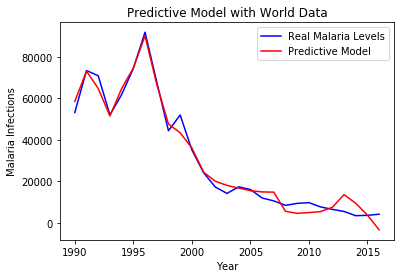

In [10]:
#Use findfeatures function with any number between 1-19
df2 = pd.read_csv('honduras_1990-2016.csv')
y = df2['Honduras']
dfSubset = findFeatures(9, y, dfT)
X = dfSubset
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# print(model.params)
# print(model.pvalues)
predictionEq = str(model.params[0])
for j in range(1, len(model.params)):
    if(model.params[j] < 0):
        predictionEq +=  ' '+str(model.params[j])+'x '
    else:
        predictionEq += ' +'+str(model.params[j])+'x '

for col in dfSubset.columns: 
    print(col) 
print(model.summary())
print(predictionEq)
plt.plot(range(1990,2017),df2['Honduras'], color='b', label='Real Malaria Levels')
plt.plot(range(1990,2017),model.predict(X), color='r', label='Predictive Model')
plt.title("Predictive Model with World Data")
plt.xlabel('Year')
plt.ylabel('Malaria Infections')
plt.legend()
plt.show()

prcpMin
prcpMax
tmpAvg
                            OLS Regression Results                            
Dep. Variable:               Honduras   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     5.516
Date:                Sun, 28 Apr 2019   Prob (F-statistic):            0.00528
Time:                        14:58:47   Log-Likelihood:                -306.72
No. Observations:                  27   AIC:                             621.4
Df Residuals:                      23   BIC:                             626.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.963e+05   1.79e

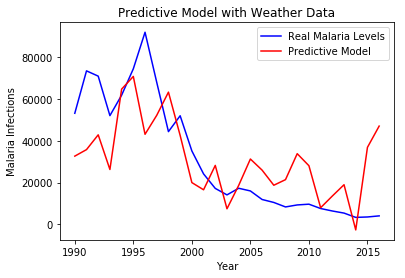

In [12]:
dfWeather = pd.read_csv('../HondurasWeather1990-2016.csv', header=0)
dfWeather = dfWeather[list(dfWeather)[1:lenCol]]

df2 = pd.read_csv('honduras_1990-2016.csv')
y = df2['Honduras']
X = dfWeather
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictionEq = str(model.params[0])
for j in range(1, len(model.params)):
    if(model.params[j] < 0):
        predictionEq +=  ' '+str(model.params[j])+'x '
    else:
        predictionEq += ' +'+str(model.params[j])+'x '

for col in dfWeather.columns: 
    print(col) 
print(model.summary())
print(predictionEq)
plt.plot(range(1990,2017),df2['Honduras'], color='b', label='Real Malaria Levels')
plt.plot(range(1990,2017),model.predict(X), color='r', label='Predictive Model')
plt.title("Predictive Model with Weather Data")
plt.xlabel('Year')
plt.ylabel('Malaria Infections')
plt.legend()
plt.show()


In [36]:
df2 = pd.read_csv('honduras_1990-2016.csv')

y = df2['Honduras']
dfSubset = findFeatures(19, y, dfT)
X = dfSubset
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
yhat = model.predict(X)
SSEFull=((y-yhat)**2).sum()

dfWeather = pd.read_csv('../HondurasWeather1990-2016.csv')
y = df2['Honduras']
X = dfWeather
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
yhat = model.predict(X)
SSERed=((y-yhat)**2).sum()


F = ((SSERed-SSEFull)/(len(dfSubset.columns)-len(dfWeather.columns)))/(SSEFull/(len(dfSubset)-len(dfSubset.columns)-1)) 
print(F)
print(stats.f.ppf(1-0.1, (len(dfSubset.columns)-len(dfWeather.columns)),(len(dfSubset)-len(dfSubset.columns)-1) ))

13.303751315305615
2.6322301246397912


The f-test proves that the predictive model using the world bank data is a better model than the model created using weather data.